In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob
import json
import os

def flatten_json(nested_json, exclude=['']):
    """Flatten json object with nested keys into a single level.
        Args:
            nested_json: A nested json object.
            exclude: Keys to exclude from output.
        Returns:
            The flattened json object if successful, None otherwise.
    """
    out = {}

    def flatten(x, name='', exclude=exclude):
        if type(x) is dict:
            for a in x:
                if a not in exclude: flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x

    flatten(nested_json)
    return out

working_folder = "../data/results/wyvern_baseline_bathy_simple_ratios_final_baseline/run_20250623T215135/plots"
os.makedirs(working_folder, exist_ok=True)

wyv_palette_values = [
    "#3b26f9",
    "#ff4848",
    "#F4037B",
    "#322c56",
    "#000000",
]
wyv_palette = sns.color_palette(wyv_palette_values, len(wyv_palette_values))

In [2]:
df = pd.read_json("../data/results/wyvern_baseline_bathy_simple_ratios_final_baseline/run_20250623T215135/results.json", orient="index")
df.reset_index(inplace=True)
#df.index.names = ["experiment"]
df.drop(["ratios", "train_test_images", "validation_images"], axis=1, inplace=True)
df["experiment_group"] = df["experiment"].str.split("single_image_").str[0]
df["model_name"] = df["experiment"].str.split("single_image_").str[-1]
df.head()

,index,experiment,test,validation,group,image_type,satellite,rgb_render_indices,experiment_group,model_name
0,wyvern_d1_molokai_single_image_random_forest,wyvern_d1_molokai_single_image_random_forest,"{'samples': 153933, 'r2': 0.969469079000102, '...","{'samples': 149179, 'r2': 0.937406440972922, '...",drag_001_molokai,wyvern,drag001,"[10, 5, 0]",wyvern_d1_molokai_,random_forest
1,wyvern_d1_molokai_single_image_svm,wyvern_d1_molokai_single_image_svm,"{'samples': 12500, 'r2': 0.910497933979258, 'r...","{'samples': 149179, 'r2': 0.816487169454518, '...",drag_001_molokai,wyvern,drag001,"[10, 5, 0]",wyvern_d1_molokai_,svm
2,wyvern_d1_molokai_single_image_lightgbm,wyvern_d1_molokai_single_image_lightgbm,"{'samples': 153933, 'r2': 0.9542709933082401, ...","{'samples': 149179, 'r2': 0.932263796976683, '...",drag_001_molokai,wyvern,drag001,"[10, 5, 0]",wyvern_d1_molokai_,lightgbm
3,wyvern_d1_molokai_single_image_xgboost,wyvern_d1_molokai_single_image_xgboost,"{'samples': 153933, 'r2': 0.9606708884239191, ...","{'samples': 149179, 'r2': 0.9155090451240541, ...",drag_001_molokai,wyvern,drag001,"[10, 5, 0]",wyvern_d1_molokai_,xgboost
4,sentinel2_d1_molokai_single_image_random_forest,sentinel2_d1_molokai_single_image_random_forest,"{'samples': 38562, 'r2': 0.9735659615844021, '...","{'samples': 37413, 'r2': 0.9383214914072241, '...",drag_001_molokai,sentinel2,sentinel2,"[4, 3, 2]",sentinel2_d1_molokai_,random_forest


In [3]:
val_df = pd.DataFrame.from_records([
    {
        f"validation_{key}": val
        for key, val in flatten_json(row["validation"]).items()
    }
    for idx, row in df.iterrows()
])

df = pd.concat([df, val_df], axis=1)
df.head()

,index,experiment,test,validation,group,image_type,satellite,rgb_render_indices,experiment_group,model_name,...,validation_rmse,validation_mae,validation_<20m_samples,validation_<20m_r2,validation_<20m_rmse,validation_<20m_mae,validation_>20m_samples,validation_>20m_r2,validation_>20m_rmse,validation_>20m_mae
0,wyvern_d1_molokai_single_image_random_forest,wyvern_d1_molokai_single_image_random_forest,"{'samples': 153933, 'r2': 0.969469079000102, '...","{'samples': 149179, 'r2': 0.937406440972922, '...",drag_001_molokai,wyvern,drag001,"[10, 5, 0]",wyvern_d1_molokai_,random_forest,...,2.294648,1.388588,125201,0.878428,1.940314,1.077234,23978,-0.452592,3.619494,3.014320
1,wyvern_d1_molokai_single_image_svm,wyvern_d1_molokai_single_image_svm,"{'samples': 12500, 'r2': 0.910497933979258, 'r...","{'samples': 149179, 'r2': 0.816487169454518, '...",drag_001_molokai,wyvern,drag001,"[10, 5, 0]",wyvern_d1_molokai_,svm,...,3.929023,2.075583,125201,0.919408,1.579800,0.929565,23978,-8.204142,9.111034,8.059509
2,wyvern_d1_molokai_single_image_lightgbm,wyvern_d1_molokai_single_image_lightgbm,"{'samples': 153933, 'r2': 0.9542709933082401, ...","{'samples': 149179, 'r2': 0.932263796976683, '...",drag_001_molokai,wyvern,drag001,"[10, 5, 0]",wyvern_d1_molokai_,lightgbm,...,2.387051,1.383191,125201,0.849633,2.157904,1.125473,23978,-0.234747,3.337067,2.728862
3,wyvern_d1_molokai_single_image_xgboost,wyvern_d1_molokai_single_image_xgboost,"{'samples': 153933, 'r2': 0.9606708884239191, ...","{'samples': 149179, 'r2': 0.9155090451240541, ...",drag_001_molokai,wyvern,drag001,"[10, 5, 0]",wyvern_d1_molokai_,xgboost,...,2.665977,1.493284,125201,0.825354,2.325598,1.169393,23978,-0.771720,3.997362,3.184478
4,sentinel2_d1_molokai_single_image_random_forest,sentinel2_d1_molokai_single_image_random_forest,"{'samples': 38562, 'r2': 0.9735659615844021, '...","{'samples': 37413, 'r2': 0.9383214914072241, '...",drag_001_molokai,sentinel2,sentinel2,"[4, 3, 2]",sentinel2_d1_molokai_,random_forest,...,2.276141,1.267355,31410,0.899297,1.764160,0.869344,6003,-0.774250,4.000537,3.349903


/var/folders/rg/jpb72q99503gth11wv_9p4mh0000gn/T/ipykernel_26689/443471894.py:9: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.barplot(melt_df, x="model_name", y="mae", hue="satellite", ax=ax, palette=wyv_palette)
/var/folders/rg/jpb72q99503gth11wv_9p4mh0000gn/T/ipykernel_26689/443471894.py:9: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.barplot(melt_df, x="model_name", y="mae", hue="satellite", ax=ax, palette=wyv_palette)
/var/folders/rg/jpb72q99503gth11wv_9p4mh0000gn/T/ipykernel_26689/443471894.py:9: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.barplot(melt_df, x="model_name", y="mae", hue="satellite", ax=ax, palette=wyv_palette)
/var/folders/rg/jpb72q99503gth11wv_9p4mh0000gn/T/ipykernel_26689/443471894.py:9: UserWarning: The palette list has more values (5) than needed (1), which may not be intended.
  sns.barplot(melt_df

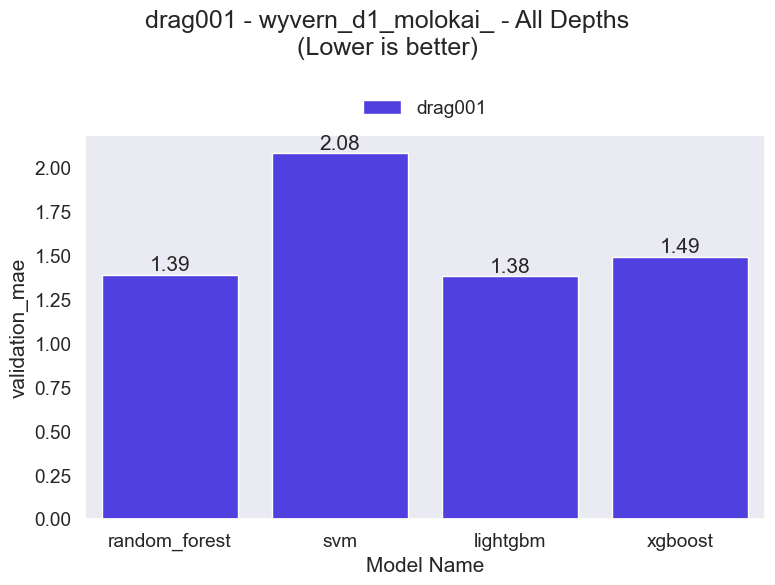

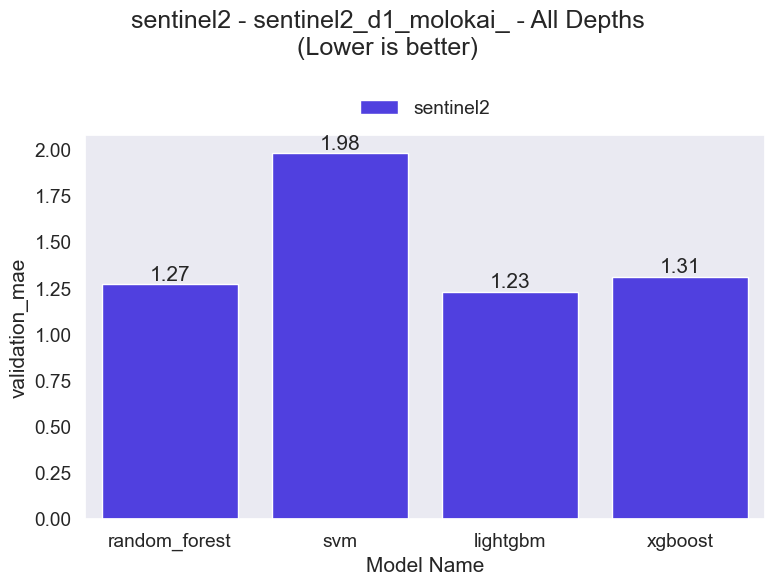

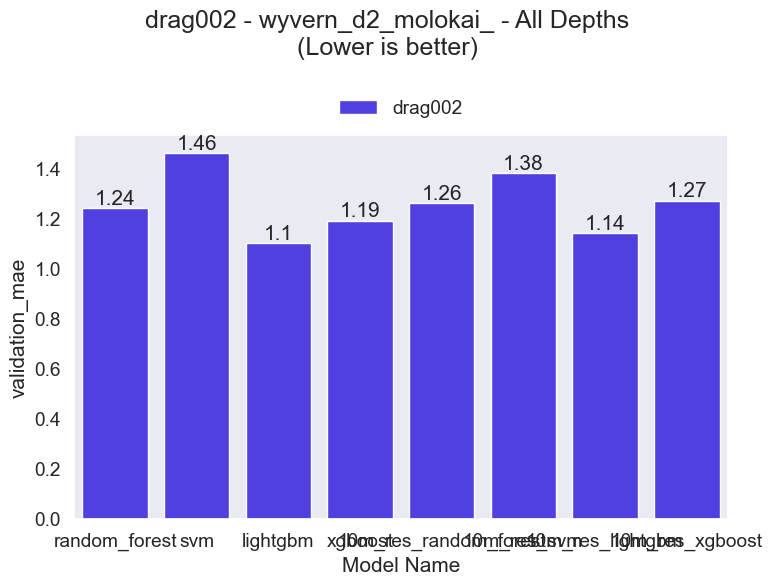

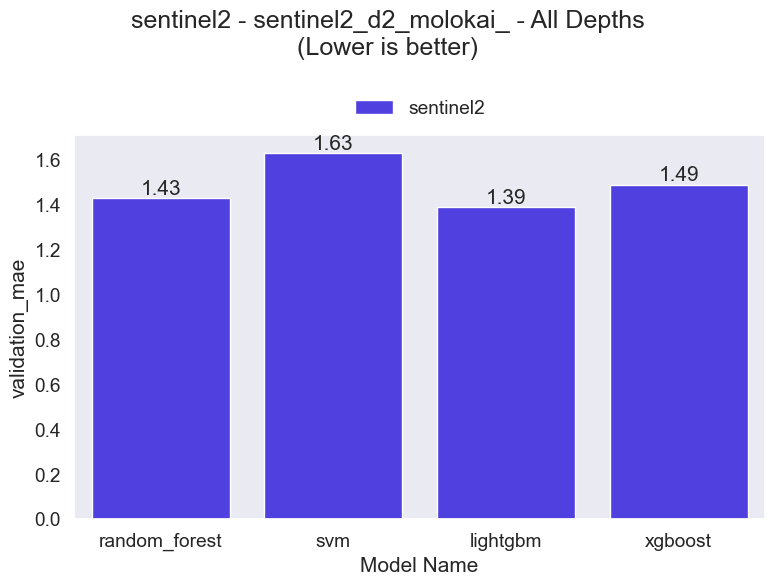

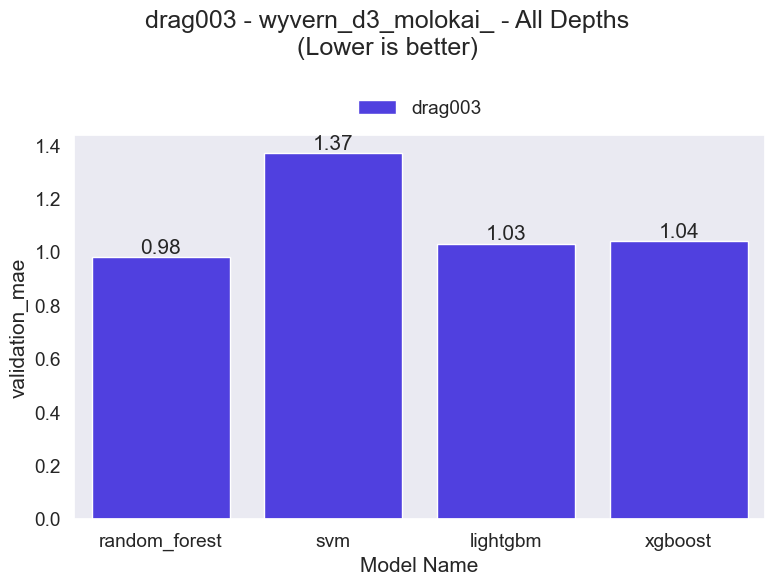

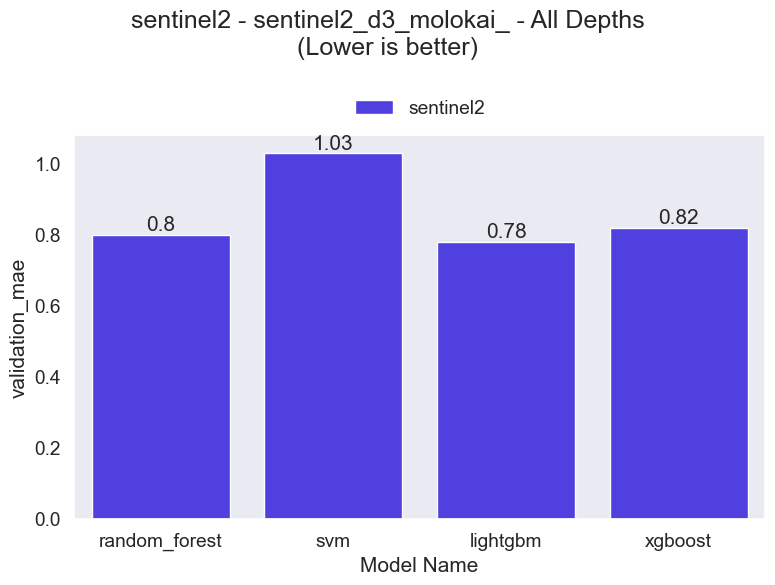

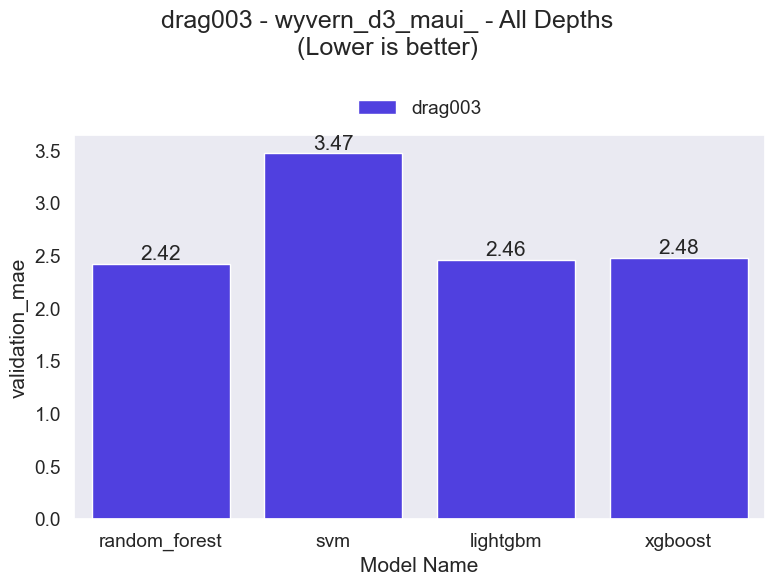

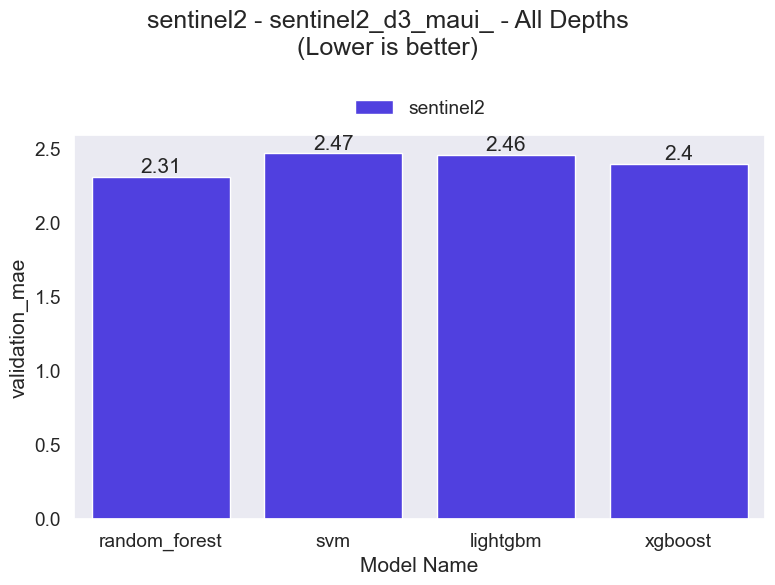

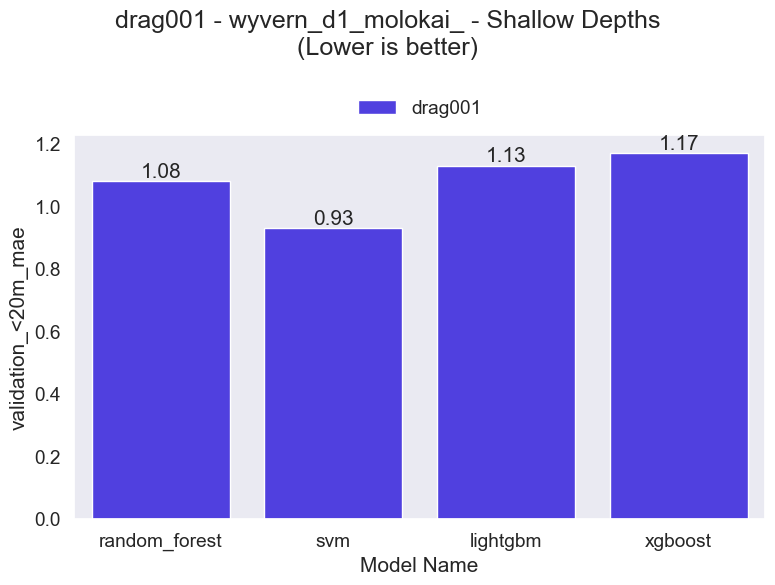

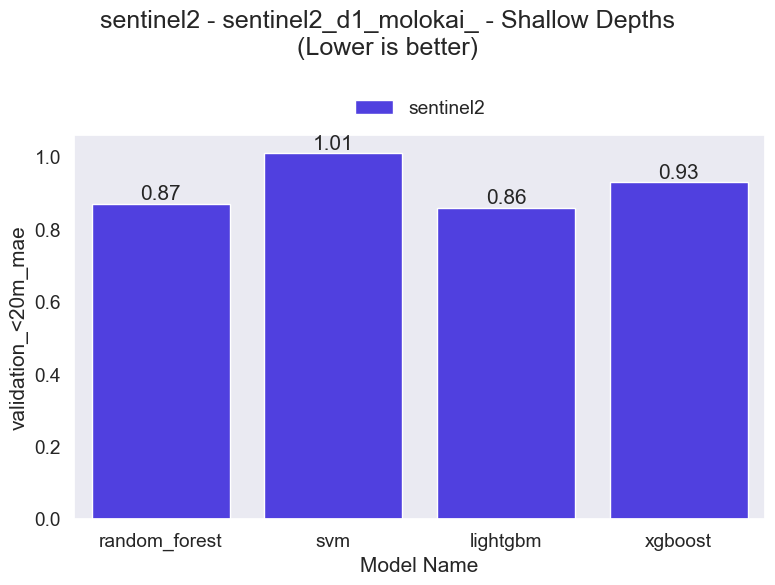

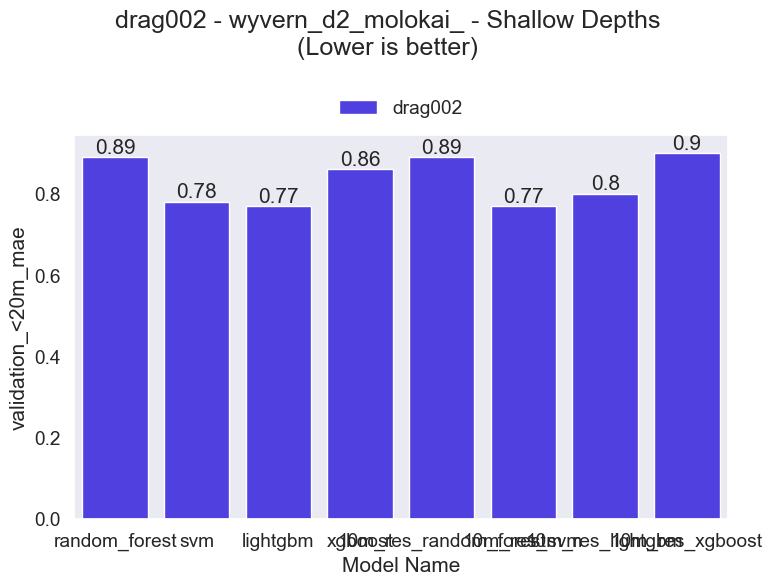

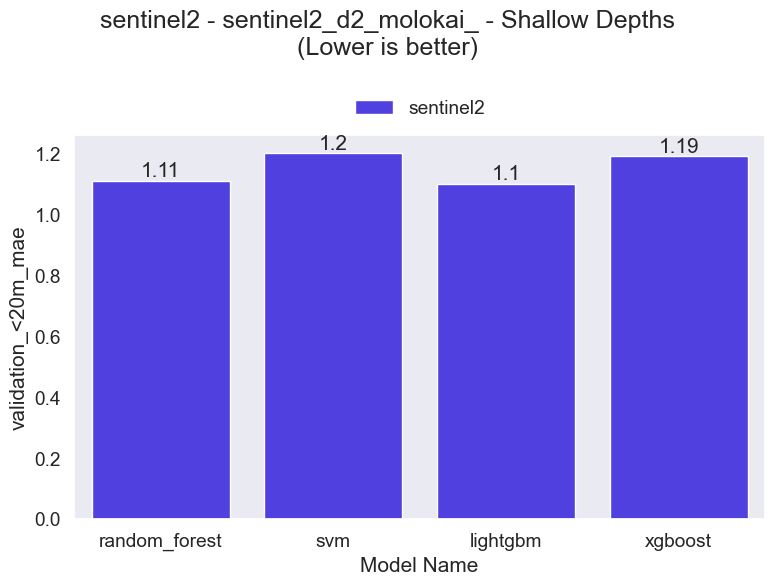

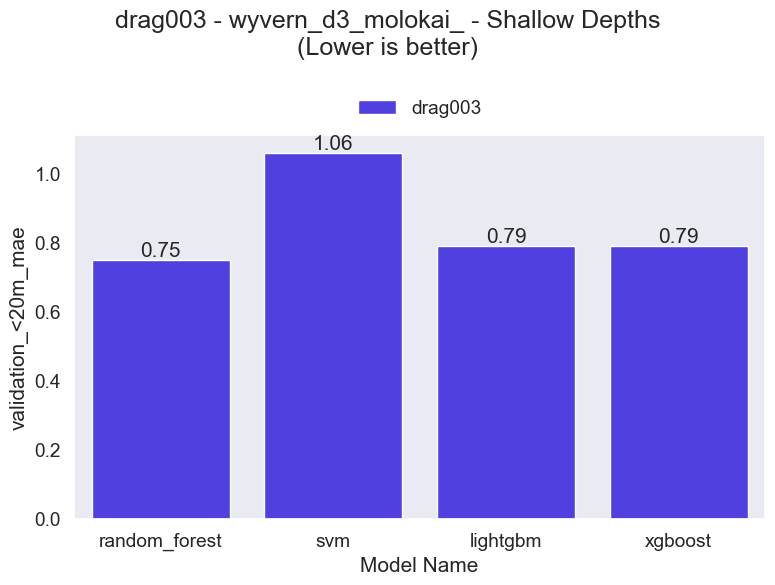

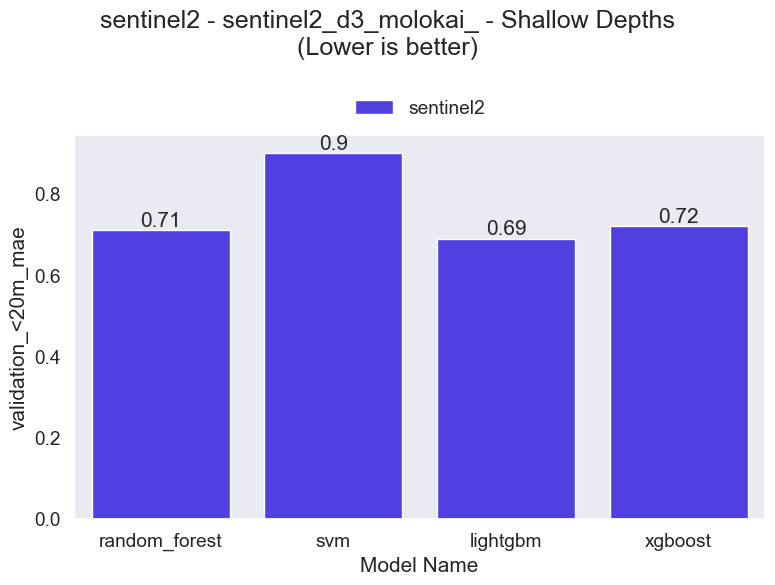

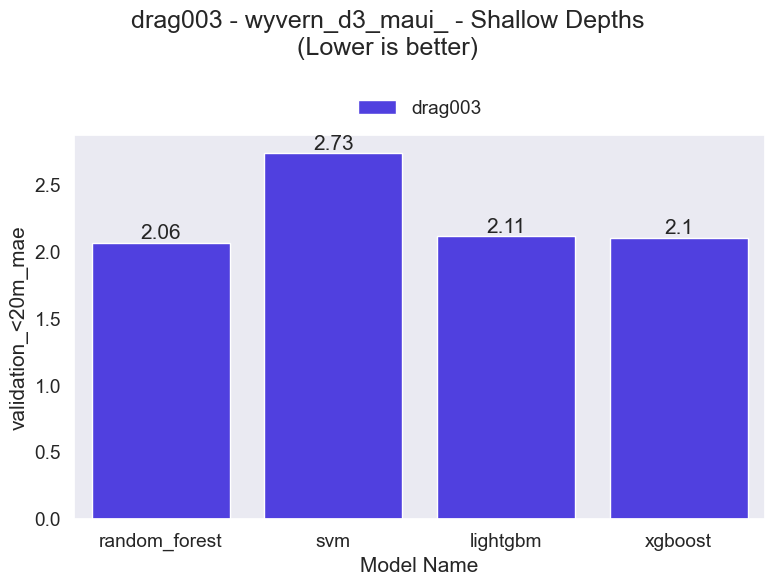

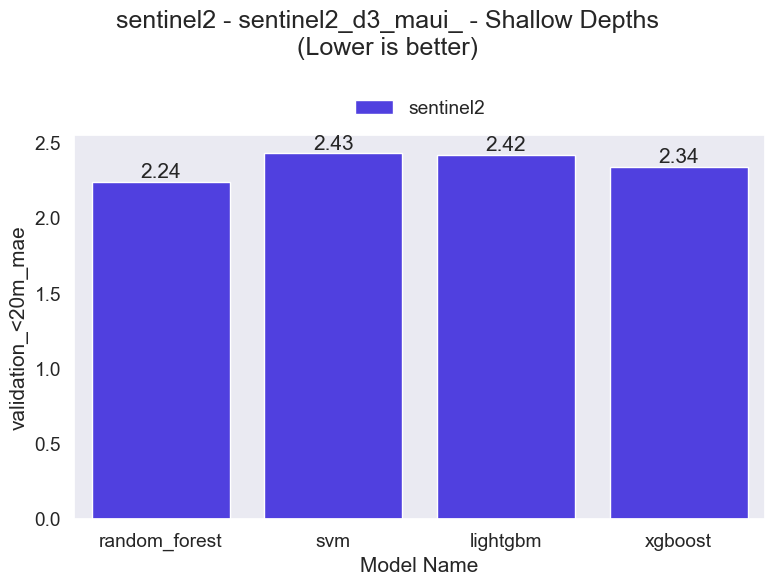

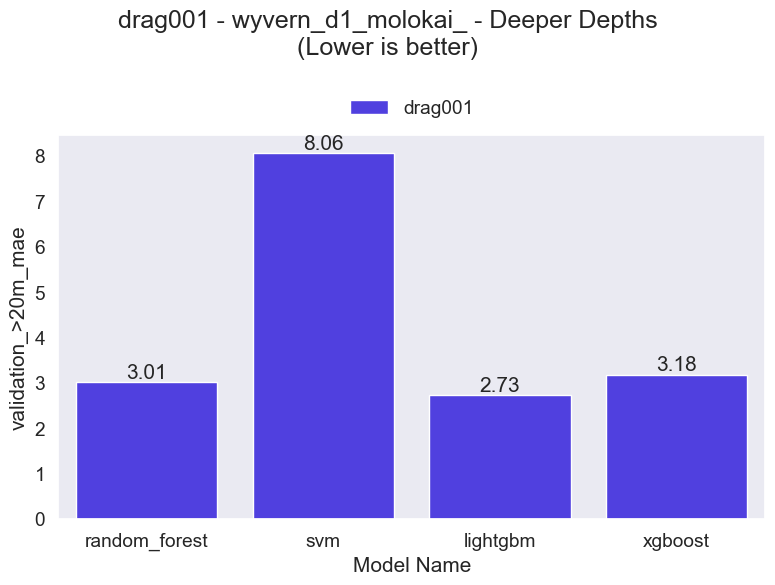

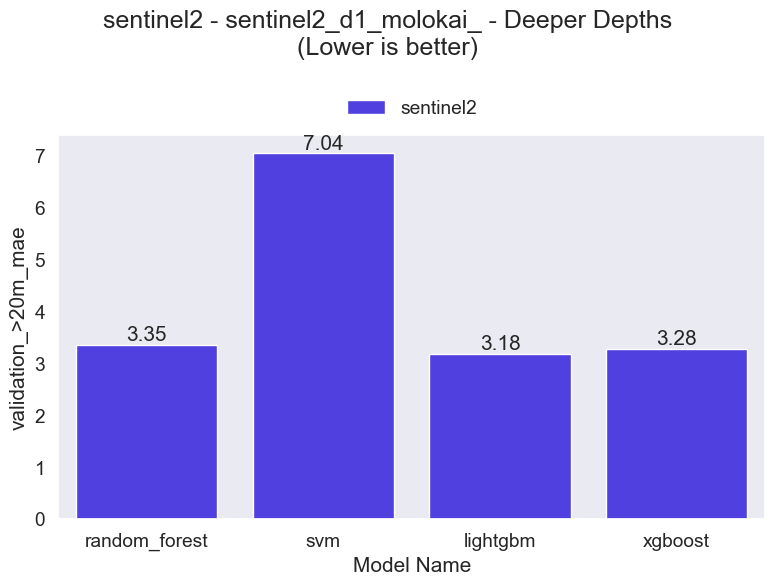

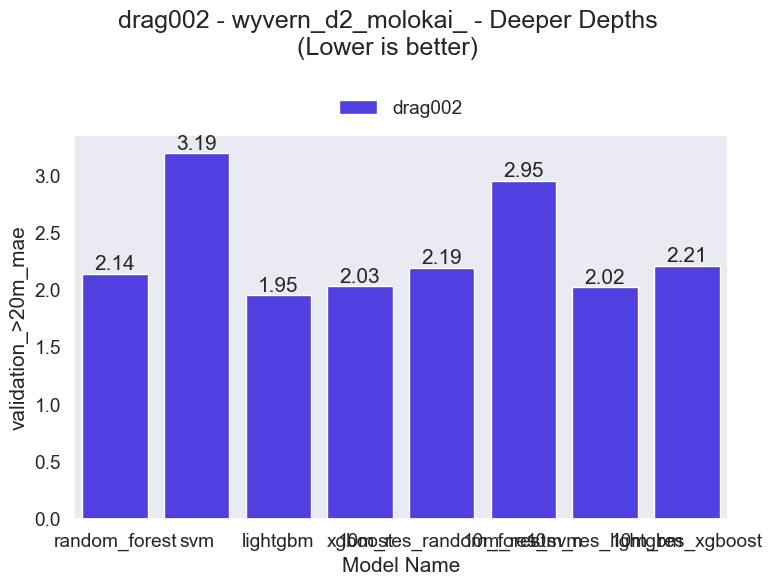

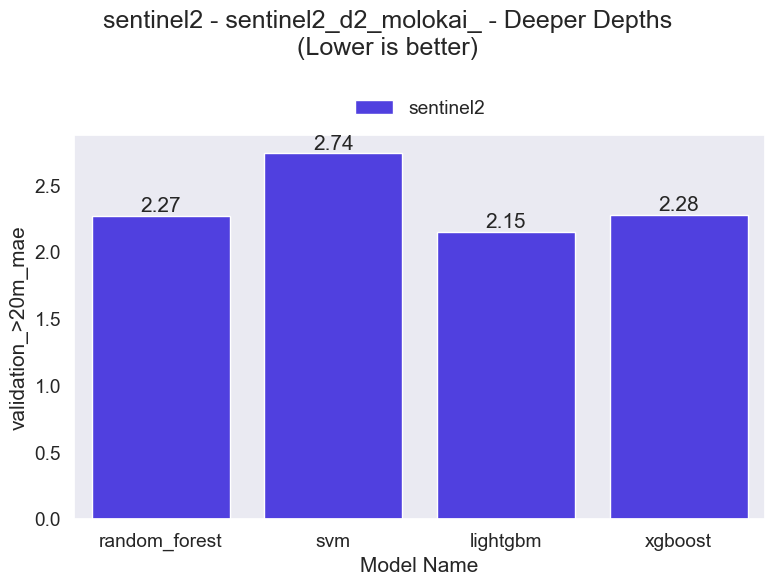

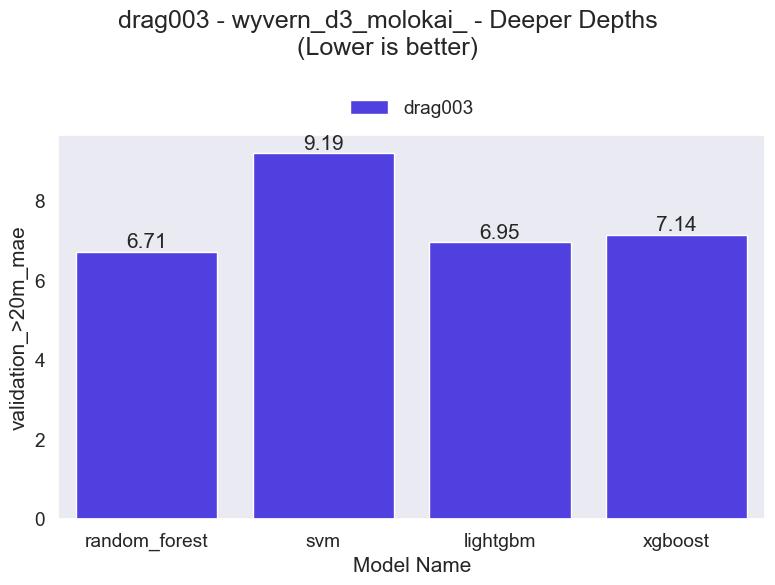

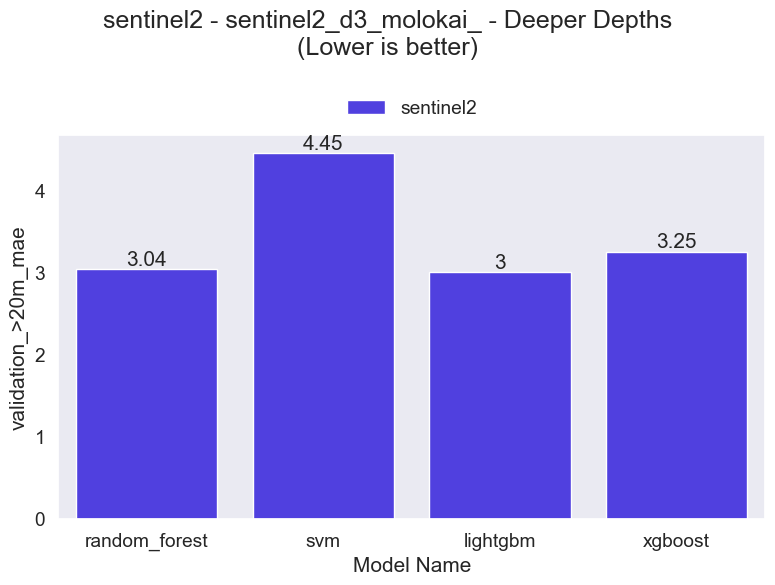

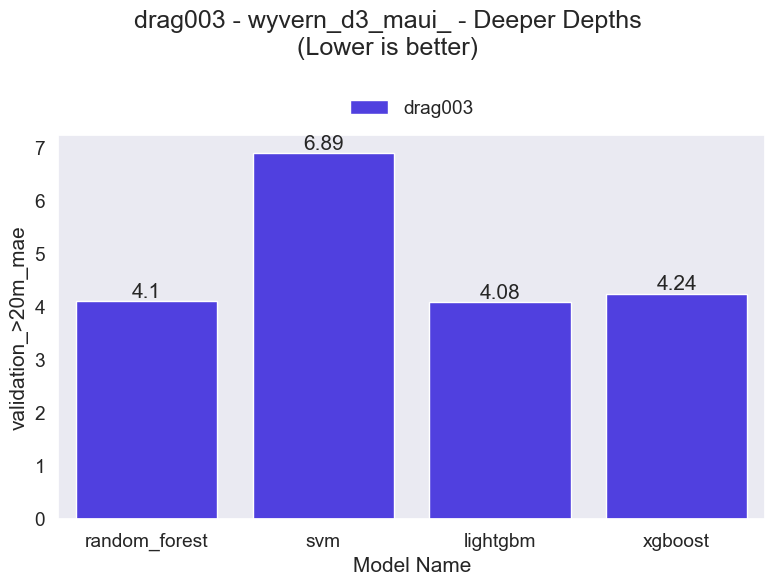

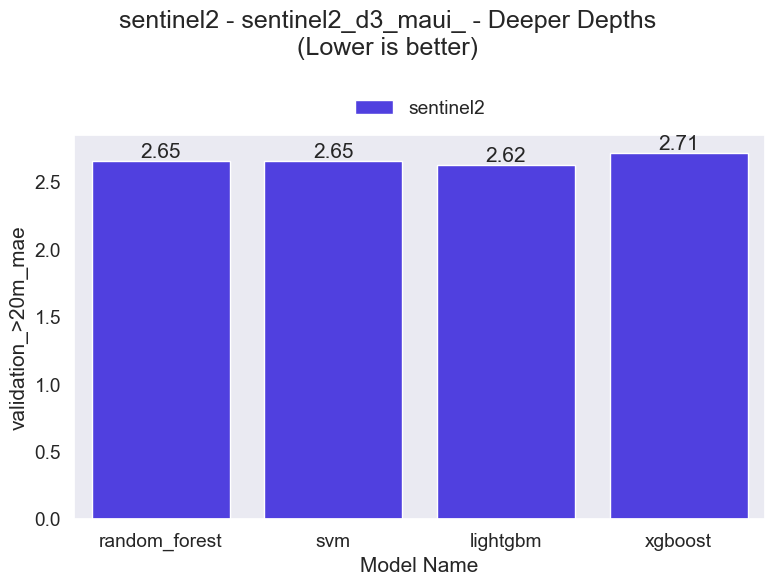

In [4]:
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.25)
for name, error_col in [("All Depths", "validation_mae"), ("Shallow Depths", "validation_<20m_mae"), ("Deeper Depths", "validation_>20m_mae")]:
    for experiment_group in df["experiment_group"].unique():
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))
        filt_df = df[(df["experiment_group"] == experiment_group)] #  & (df["satellite"] != "dragonette-002_10m")
        melt_df = filt_df.melt(id_vars=["experiment_group", "satellite", "model_name"], value_vars=[error_col], value_name="mae")
        melt_df["mae"] = melt_df["mae"].round(2)
        sns.barplot(melt_df, x="model_name", y="mae", hue="satellite", ax=ax, palette=wyv_palette)
        ax.set(ylabel="Mean Absolute Error (m)", xlabel="Model Name")
        sns.move_legend(
            ax, "lower center",
            bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
        )
        ax.set(ylabel=error_col)
        for i in ax.containers:
            i.datavalues = np.round(i.datavalues, 2)
            ax.bar_label(i,)

        title_str = f"{filt_df.iloc[0]['satellite']} - {filt_df.iloc[0]['experiment_group']} - {name}"
        plt.suptitle(f"{title_str}\n(Lower is better)")
        plt.tight_layout()
        plt.savefig(f"{working_folder}/{title_str.replace(' ', '_')}_{error_col}.jpg", dpi=150)

/var/folders/rg/jpb72q99503gth11wv_9p4mh0000gn/T/ipykernel_26689/503814560.py:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.barplot(melt_df, x="satellite", y="mae", hue="variable", palette=wyv_palette[2:])


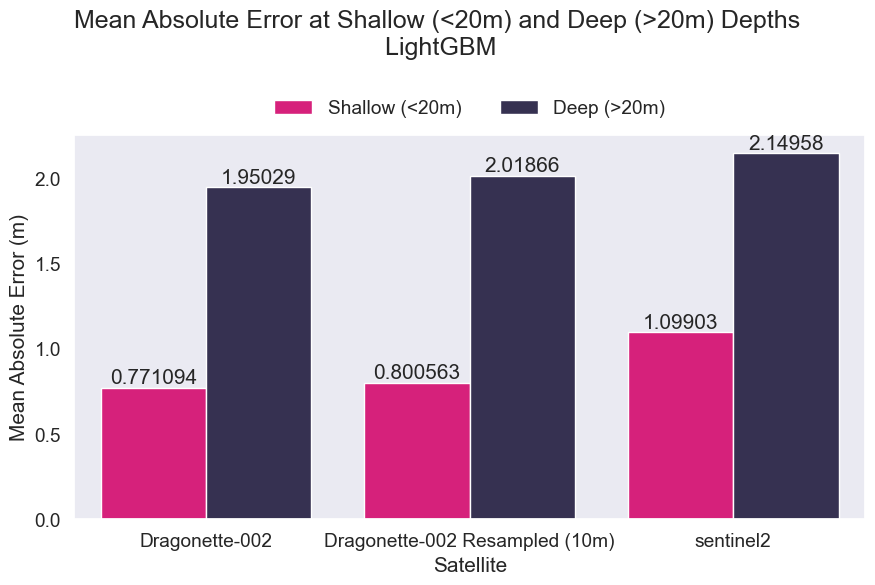

In [5]:
# Plot related to investigating performance over multiple satellites for the same experiment (image)
sat = "Dragonette-002"
model_name = "LightGBM"
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.25)
df.loc[(df["index"] == "wyvern_d2_molokai_single_image_10m_res_lightgbm"), "satellite"] = "Dragonette-002 Resampled (10m)"
filt_df = df[(df["group"] == "drag_002_molokai") & (df["model_name"].isin(["lightgbm", "10m_res_lightgbm"]))] #  & (df["satellite"] != "dragonette-002_10m")
melt_df = filt_df.melt(id_vars=["satellite"], value_vars=["validation_<20m_mae", "validation_>20m_mae"], value_name="mae")
map_dict = {"validation_<20m_mae": "Shallow (<20m)", "validation_>20m_mae": "Deep (>20m)"}
sat_replace_dict = {"drag002": "Dragonette-002", "sentinel-2": "Sentinel-2"}
melt_df.replace({"variable": map_dict, "satellite": sat_replace_dict}, inplace=True)
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.barplot(melt_df, x="satellite", y="mae", hue="variable", palette=wyv_palette[2:])
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
ax.set(ylabel="Mean Absolute Error (m)", xlabel="Satellite")
for i in ax.containers:
    i.datavalues = np.round(i.datavalues, 2)
    ax.bar_label(i,)

plt.suptitle(f"Mean Absolute Error at Shallow (<20m) and Deep (>20m) Depths\n LightGBM")
plt.tight_layout()
# plt.savefig(f"{working_folder}/{title_str.replace(' ', '_')}_{error_col}.jpg", dpi=150)
plt.show()


/var/folders/rg/jpb72q99503gth11wv_9p4mh0000gn/T/ipykernel_26689/251935525.py:22: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(melt_df, x="experiment_group", y="mae", hue="satellite", palette=wyv_palette)


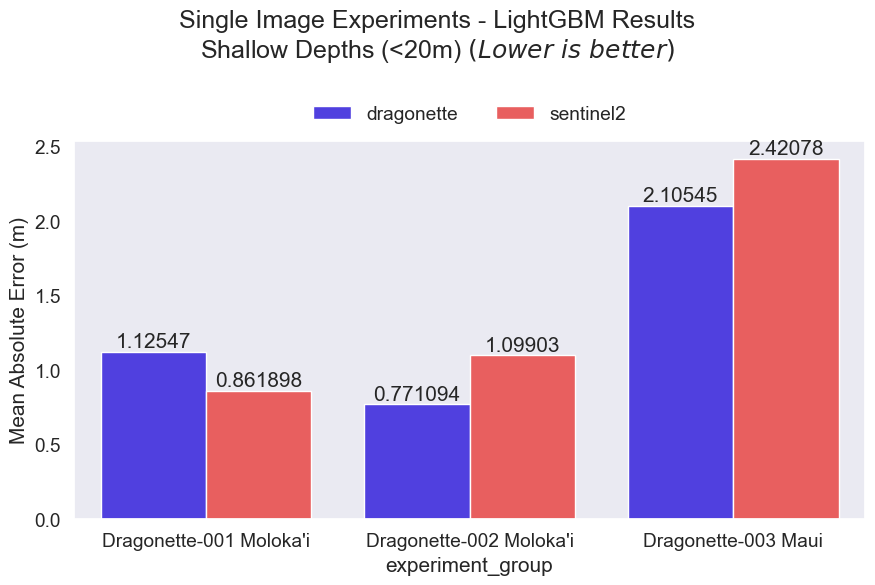

In [6]:
# Plot related to showing performance of D2 + S2 over multiple images using the same model
sat = "Dragonette-002"
model_name = "LightGBM"
sns.set_style("dark")
sns.set_context("notebook", font_scale=1.25)

filt_df = df[(df["satellite"].isin(["sentinel2", "drag002", "drag001", "drag003"])) & (df["model_name"] == "lightgbm")]
filt_df = filt_df[(~filt_df["experiment_group"].isin(["wyvern_d3_molokai_", "sentinel2_d3_molokai_", "10m_res_lightgbm"]))]
melt_df = filt_df.melt(id_vars=["satellite", "experiment_group", "model_name"], value_vars=["validation_<20m_mae"], value_name="mae")
sat_replace_dict = {"drag001": "dragonette", "drag002": "dragonette", "drag003": "dragonette"}
exp_replace_dict = {
    "wyvern_d1_molokai_": "Dragonette-001 Moloka'i",
    "wyvern_d3_maui_": "Dragonette-003 Maui",
    "wyvern_d2_molokai_": "Dragonette-002 Moloka'i",
    "sentinel2_d1_molokai_": "Dragonette-001 Moloka'i",
    "sentinel2_d2_molokai_": "Dragonette-002 Moloka'i",
    "sentinel2_d3_maui_": "Dragonette-003 Maui",
}
melt_df.replace({"satellite": sat_replace_dict, "experiment_group": exp_replace_dict}, inplace=True)
melt_df = melt_df.sort_values("experiment_group")
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.barplot(melt_df, x="experiment_group", y="mae", hue="satellite", palette=wyv_palette)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
ax.set(ylabel="Mean Absolute Error (m)")
for i in ax.containers:
    i.datavalues = np.round(i.datavalues, 2)
    ax.bar_label(i,)

plt.suptitle(f"Single Image Experiments - {model_name} Results\nShallow Depths (<20m) $(Lower\ is\ better)$")
plt.tight_layout()
plt.savefig(f"{working_folder}/single_image_experiments_shallow_depths.jpg", dpi=150)
plt.show()

/var/folders/rg/jpb72q99503gth11wv_9p4mh0000gn/T/ipykernel_14197/1798447577.py:14: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(melt_df, x="experiment_group", y="mae", hue="satellite", palette=wyv_palette)


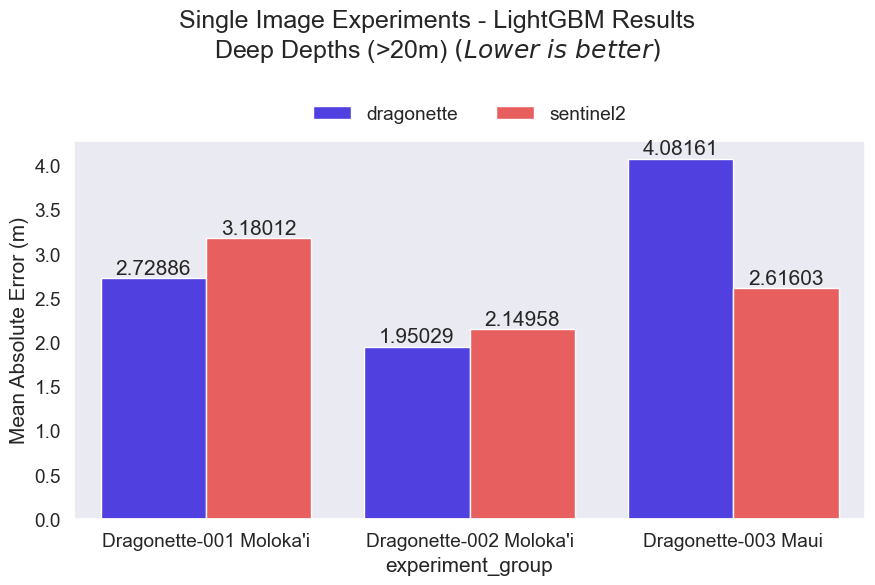

In [8]:
melt_df = filt_df.melt(id_vars=["satellite", "experiment_group", "model_name"], value_vars=["validation_>20m_mae"], value_name="mae")
sat_replace_dict = {"drag001": "dragonette", "drag002": "dragonette", "drag003": "dragonette"}
exp_replace_dict = {
    "wyvern_d1_molokai_": "Dragonette-001 Moloka'i",
    "wyvern_d3_maui_": "Dragonette-003 Maui",
    "wyvern_d2_molokai_": "Dragonette-002 Moloka'i",
    "sentinel2_d1_molokai_": "Dragonette-001 Moloka'i",
    "sentinel2_d2_molokai_": "Dragonette-002 Moloka'i",
    "sentinel2_d3_maui_": "Dragonette-003 Maui",
}
melt_df.replace({"satellite": sat_replace_dict, "experiment_group": exp_replace_dict}, inplace=True)
melt_df = melt_df.sort_values("experiment_group")
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
sns.barplot(melt_df, x="experiment_group", y="mae", hue="satellite", palette=wyv_palette)
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
)
ax.set(ylabel="Mean Absolute Error (m)")
for i in ax.containers:
    i.datavalues = np.round(i.datavalues, 2)
    ax.bar_label(i,)

plt.suptitle(f"Single Image Experiments - {model_name} Results\nDeep Depths (>20m) $(Lower\ is\ better)$")
plt.tight_layout()
plt.savefig(f"{working_folder}/single_image_experiments_deep_depths.jpg", dpi=150)
plt.show()

In [71]:
filt_df = df[(df["satellite"].isin(["sentinel-2", "dragonette-002", "dragonette-001", "dragonette-003"])) & (df["model_name"] == "lightgbm")]
melt_df = filt_df.melt(id_vars=["satellite", "experiment_group", "model_name"], value_vars=["validation_<20m_mae"], value_name="mae")
sat_replace_dict = {"dragonette-001": "dragonette", "dragonette-002": "dragonette", "dragonette-003": "dragonette"}
exp_replace_dict = {"5dc97ba2_molokai": "Dragonette-001 Moloka'i", "64e116d6_maui": "Dragonette-003 Maui", "4788dc6b_molokai": "Dragonette-002 Moloka'i"}
melt_df.replace({"satellite": sat_replace_dict, "experiment_group": exp_replace_dict}, inplace=True)
melt_df

,satellite,experiment_group,model_name,variable,mae
0,dragonette,Dragonette-001 Moloka'i,lightgbm,validation_<20m_mae,1.100735
1,sentinel-2,Dragonette-001 Moloka'i,lightgbm,validation_<20m_mae,0.885485
2,dragonette,Dragonette-003 Maui,lightgbm,validation_<20m_mae,2.137676
3,sentinel-2,Dragonette-003 Maui,lightgbm,validation_<20m_mae,2.443573
4,dragonette,Dragonette-002 Moloka'i,lightgbm,validation_<20m_mae,0.928920
5,sentinel-2,Dragonette-002 Moloka'i,lightgbm,validation_<20m_mae,1.122659


In [68]:
df["satellite"].unique()

array(['dragonette-001', 'sentinel-2', 'dragonette-003', 'dragonette-002',
       'dragonette-002_10m', 'enmap'], dtype=object)

In [67]:
filt_df

,satellite,model_name,experiment_name,image_path,label_path,train_aoi_path,val_aoi_path,rgb_render_indices,ratios,test_samples,...,validation_mae,validation_<20m_samples,validation_<20m_r2,validation_<20m_rmse,validation_<20m_mae,validation_>20m_samples,validation_>20m_r2,validation_>20m_rmse,validation_>20m_mae,experiment_group
Sentinel-2 Molokai - LightGBM -30m max,sentinel-2,lightgbm,Sentinel-2 Molokai - LightGBM -30m max,../data/5dc97ba2_molokai/S2A_MSIL2A_20250114T2...,../data/5dc97ba2_molokai/S2A_MSIL2A_20250114T2...,../data/5dc97ba2_molokai/5dc97ba2_traintest_ao...,../data/5dc97ba2_molokai/5dc97ba2_validation_a...,"[3, 2, 0]",NaN,38209,...,1.259395,31358,0.894299,1.812732,0.885485,6097,-0.640325,3.860200,3.182483,5dc97ba2_molokai
Sentinel-2 Maui (SOEST) - LightGBM -30m max,sentinel-2,lightgbm,Sentinel-2 Maui (SOEST) - LightGBM -30m max,../data/64e116d6_maui/S2A_MSIL2A_20241205T2109...,../data/64e116d6_maui/S2B_MSIL2A_20250228T2109...,../data/64e116d6_maui/64e116d6_traintest_aoi.g...,../data/64e116d6_maui/64e116d6_validation_aoi....,"[3, 2, 0]",[],33475,...,2.480667,37505,0.666067,3.213264,2.443573,8086,-0.191160,3.222354,2.652719,64e116d6_maui
Wyvern DRAG002 AROSICS Molokai (SOEST) - LightGBM -30m max + ratios,dragonette-002,lightgbm,Wyvern DRAG002 AROSICS Molokai (SOEST) - Light...,../data/4788dc6b_molokai/wyvern_dragonette-002...,../data/4788dc6b_molokai/wyvern_dragonette-002...,../data/4788dc6b_molokai/4788dc6b_traintest_ao...,../data/4788dc6b_molokai/4788dc6b_validation_a...,"[10, 5, 0]","[[Band_502, Band_569], [Band_489, Band_569], [...",120861,...,1.287596,154598,0.952354,1.366630,0.928920,61139,-0.002486,2.812637,2.194555,4788dc6b_molokai
Sentinel-2 Molokai D2 (SOEST) - LightGBM -30m max,sentinel-2,lightgbm,Sentinel-2 Molokai D2 (SOEST) - LightGBM -30m max,../data/4788dc6b_molokai/S2B_MSIL2A_20250228T2...,../data/4788dc6b_molokai/S2B_MSIL2A_20250228T2...,../data/4788dc6b_molokai/4788dc6b_traintest_ao...,../data/4788dc6b_molokai/4788dc6b_validation_a...,"[3, 2, 0]",[],33955,...,1.425144,43426,0.936862,1.573653,1.122659,17171,0.014589,2.788661,2.190137,4788dc6b_molokai


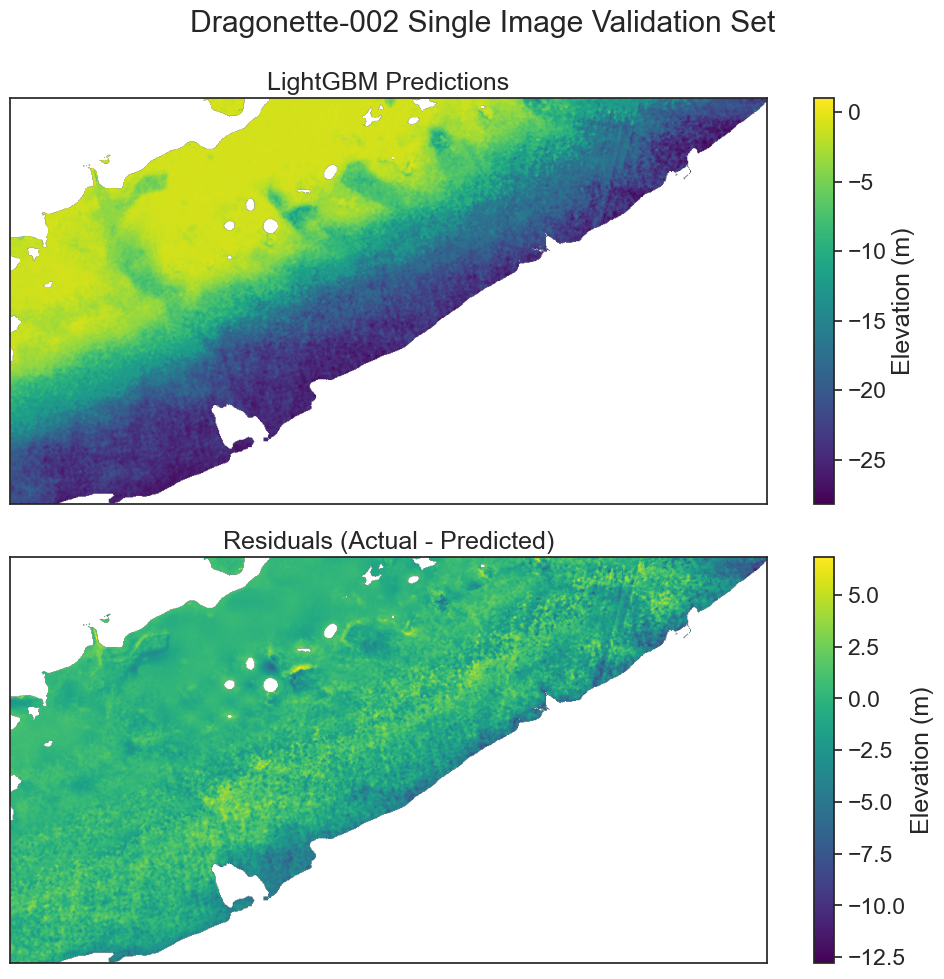

In [32]:
# wyvern_drag002_arosics_molokai_(soest)_-_lightgbm_-30m_max_+_ratios_20250328T144343
# wyvern_drag001_arosics_molokai_-_lightgbm_-30m_max_20250328T141945
# wyvern_drag003_maui_(soest)_-_lightgbm_-30m_max_+_ratios_20250328T143042
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5)
val_preds = np.load("../data/results/wyvern_baseline_bathy_simple_ratios_final_baseline/run_20250623T215135/wyvern_d2_molokai_single_image_lightgbm/val_preds.npy")
val_actual = np.load("../data/results/wyvern_baseline_bathy_simple_ratios_final_baseline/run_20250623T215135/wyvern_d2_molokai_single_image_lightgbm/val_true.npy")
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
pred_img = axs[0].imshow(val_preds[:550, :], cmap="viridis")
axs[0].set_title("LightGBM Predictions")
axs[0].set_aspect('auto')
axs[0].set_xticks([])
axs[0].set_yticks([])
plt.colorbar(pred_img, ax=axs[0], label="Elevation (m)")

resid_img = axs[1].imshow((val_actual - val_preds)[:550, :], cmap="viridis")
plt.colorbar(resid_img, ax=axs[1], label="Elevation (m)")
axs[1].set_title("Residuals (Actual - Predicted)")
axs[1].set_aspect('auto')
axs[1].set_xticks([])
axs[1].set_yticks([])
plt.suptitle("Dragonette-002 Single Image Validation Set")
plt.tight_layout()
plt.savefig("drag002-predictions-vis.jpg", dpi=200)
plt.show()

In [56]:
ax[0].spines

TypeError: 'Axes' object is not subscriptable

In [ ]:
# Let's do some surface plots!
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.ndimage import uniform_filter
from scipy.ndimage import gaussian_filter
import seaborn as sns
import numpy as np

sns.reset_defaults()
val_preds = np.load("previous_results/wyvern_drag002_arosics_molokai_(soest)_-_lightgbm_-30m_max_+_ratios_20250328T144343/val_preds.npy")
val_actual = np.load("previous_results/wyvern_drag002_arosics_molokai_(soest)_-_lightgbm_-30m_max_+_ratios_20250328T144343/val_true.npy")

# fig = make_subplots(
#     rows=1,
#     cols=1,
#     specs=[[{'type': 'surface'}, {'type': 'surface'}]],
#     subplot_titles=("LightGBM", "Ground Truth"),
#     horizontal_spacing = 0.025
# )

fig = go.Figure(go.Surface(z=val_preds, showscale=True))

# fig.add_trace(
#     go.Surface(z=gaussian_filter(val_preds, 1.5), showscale=True),
#     row=1, col=1
# )
# fig.add_trace(
#     go.Surface(z=val_actual, showscale=False),
#     row=1, col=2
# )

x_eye = -1.25
y_eye = 2
z_eye = 0.5

fig.update_layout(title=dict(text='DRAG002 - Molokai - Validation Set Predictions'), autosize=True,
                  width=1300, height=700,
                  margin=dict(l=65, r=50, b=65, t=90),
                  scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
                  updatemenus=[dict(type='buttons',
                  showactive=False,
                  y=1,
                  x=0.8,
                  xanchor='left',
                  yanchor='bottom',
                  pad=dict(t=45, r=10),
                  buttons=[dict(label='Play',
                                 method='animate',
                                 args=[None, dict(frame=dict(duration=0.25, redraw=True), 
                                                             transition=dict(duration=0),
                                                             fromcurrent=True,
                                                             mode='immediate'
                                                            )]
                                            )
                                      ]
                              )
                        ]
)

def rotate_z(x, y, z, theta):
    w = x+1j*y
    return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

frames=[]
for t in np.arange(0, 6.26, 0.005):
    xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
    frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
fig.frames=frames


fig.show(renderer="browser") # x

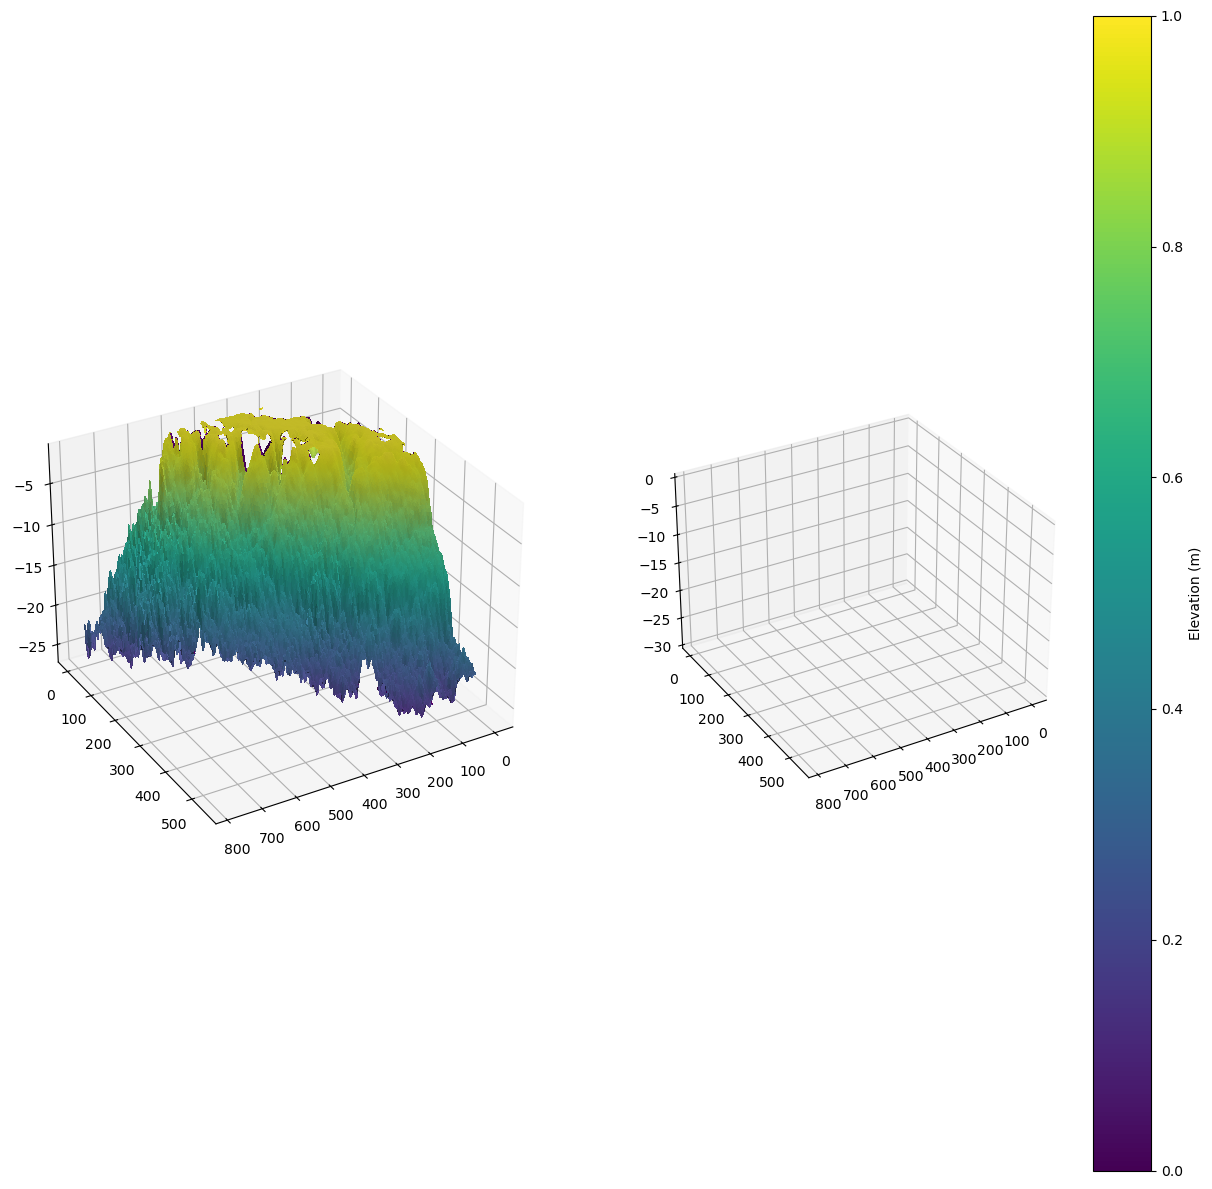

In [30]:
import matplotlib.pyplot as plt
from matplotlib import cbook, cm
from matplotlib.colors import LightSource
from matplotlib import animation
sns.reset_defaults()


fig, axs = plt.subplots(1, 2, figsize=(15, 15), subplot_kw=dict(projection='3d'))
filt_preds = gaussian_filter(val_preds[0:550,:], 2)
filt_act = val_actual[0:550,:]
x = np.arange(filt_preds.shape[1])
y = np.arange(filt_preds.shape[0])
x, y = np.meshgrid(x, y)

ls = LightSource(270, 45)
# To use a custom hillshading mode, override the built-in shading and pass
# in the rgb colors of the shaded surface calculated from "shade".
rgb = ls.shade(np.where(np.isnan(filt_preds), -30, filt_preds), cmap=cm.viridis, vert_exag=0.1, blend_mode='soft')
rgb_act = ls.shade(np.where(np.isnan(filt_act), -30, filt_preds), cmap=cm.viridis, vert_exag=0.1, blend_mode='soft')

img_plt = axs[0].plot_surface(x, y, filt_preds, rstride=2, cstride=2, facecolors=rgb, linewidth=0, antialiased=False)
img_plt_act = axs[1].plot_surface(x, y, filt_act, rstride=2, cstride=2, facecolors=rgb_act, linewidth=0, antialiased=False)

cbar = plt.colorbar(img_plt, ax=axs[1], label="Elevation (m)")
axs[0].view_init(30, 60)
axs[1].view_init(30, 60)

def init():
    axs[0].plot_surface(x, y, filt_preds, rstride=2, cstride=2, facecolors=rgb, linewidth=0, antialiased=False)
    axs[1].plot_surface(x, y, filt_act, rstride=2, cstride=2, facecolors=rgb_act, linewidth=0, antialiased=False)
    return fig,

def animate(i):
    axs[0].view_init(30, i)
    axs[1].view_init(30, i)
    return fig,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=30, blit=True)
# Save
# anim.save('basic_animation.gif')
plt.show()

In [125]:
analysis_preds = val_preds[0:550,:]
filt_preds = gaussian_filter(analysis_preds, 2)
filt_preds = np.where(np.isnan(analysis_preds), np.nan, filt_preds)
filt_preds = np.where(~np.isnan(analysis_preds) & np.isnan(filt_preds), analysis_preds, filt_preds)
filt_preds

array([[         nan,          nan,          nan, ..., -22.24114086,
        -22.03920063, -21.95552532],
       [         nan,          nan,          nan, ..., -22.87522475,
        -22.67313419, -22.57625119],
       [         nan,          nan,          nan, ..., -23.83113914,
        -23.60977482, -23.48133867],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

In [126]:
from sklearn.metrics import r2_score, PredictionErrorDisplay, root_mean_squared_error, mean_absolute_error

flat_filt_preds = filt_preds.reshape(filt_preds.shape[0] * filt_preds.shape[1])
flat_actuals = val_actual.reshape(val_actual.shape[0] * val_actual.shape[1])

In [ ]:
mean_absolute_error(flat_actuals[~np.isnan(flat_actuals)], flat_filt_preds[~np.isnan(flat_filt_preds)])


1.0869615729760917

In [131]:
r2_score(flat_actuals[~np.isnan(flat_actuals)], flat_filt_preds[~np.isnan(flat_filt_preds)])

0.9701196113062195

In [132]:
root_mean_squared_error(flat_actuals[~np.isnan(flat_actuals)], flat_filt_preds[~np.isnan(flat_filt_preds)])

1.6335694219183066